# Ведьгун Е.А. ИУ5-64Б РК№1 ТМО Вариант№2

# Задача №1
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
## Набор данных:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
## Дополнительные требования по группам:
Для студентов группы ИУ5-64Б - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

## 1) Основные характеристики датасета

In [31]:
# импорт библиотек
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [52]:
# преобразование и загрузка данных 
iris = load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [33]:
# первые 5 столбцов таблицы
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
# проверим есть ли пропущенные значения
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [36]:
# размер датасета
df.shape

(150, 5)

## 2) Визуальный анализ данных
### Скрипичная диаграмма

C:\Users\mi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

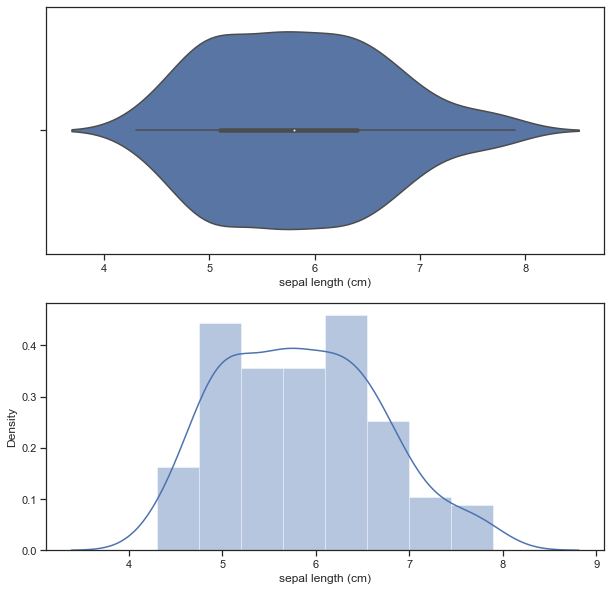

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['sepal length (cm)'])
sns.distplot(df['sepal length (cm)'], ax=ax[1])

C:\Users\mi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

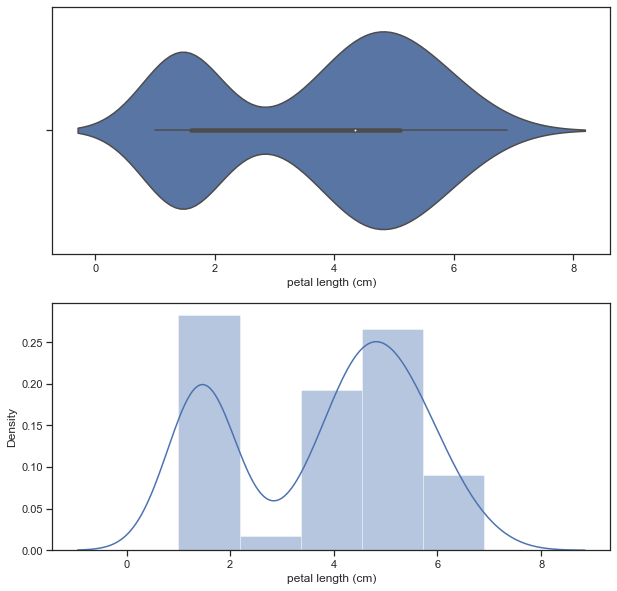

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['petal length (cm)'])
sns.distplot(df['petal length (cm)'], ax=ax[1])

## 3) Информация о корреляции признаков

In [46]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


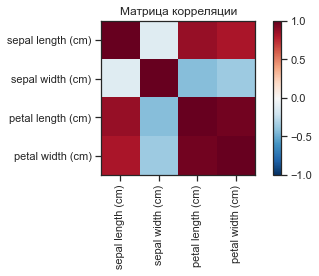

In [58]:
feature_names = iris["feature_names"]
ax = plt.axes()
im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("", rotation=0)
ax.set_title("Матрица корреляции")
plt.tight_layout()

Возьмем в качестве целевого признака 'sepal length (cm)', тогда на основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак наиболее сильно коррелирует с petal length (0.87) и petal width (0.82). Эти признаки обязательно следует оставить в модели.
- Целевой признак слабо коррелирует с sepal width. Скорее всего этот признак стоит исключить из модели, он только ухудшит ее качество.